In [36]:
# Dynamic Supply Chain Logistics Dataset - Data Preprocessing
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Starting data preprocessing pipeline...")


Libraries imported successfully!
Starting data preprocessing pipeline...


In [37]:
# Load the dataset
df = pd.read_csv('data/dynamic_supply_chain_logistics_dataset.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Number of samples: {df.shape[0]}")

# Display basic information about the dataset
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nTarget variable distribution:")
print(df['risk_classification'].value_counts())
print("\nTarget variable percentages:")
print(df['risk_classification'].value_counts(normalize=True) * 100)


Dataset loaded successfully!
Dataset shape: (32065, 26)
Number of features: 25
Number of samples: 32065

DATASET OVERVIEW

Column names:
['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'risk_classification', 'delivery_time_deviation']

Data types:
timestamp                           object
vehicle_gps_latitude               float64
vehicle_gps_longitude              float64
fuel_consumption_rate              float64
eta_variation_hours              

In [38]:
# Check for missing values
print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

# Filter columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    print(missing_df)
else:
    print("No missing values found in the dataset!")

# Display first few rows to understand the data structure
print("\n" + "="*50)
print("FIRST 5 ROWS OF DATA")
print("="*50)
print(df.head())


MISSING VALUES ANALYSIS
No missing values found in the dataset!

FIRST 5 ROWS OF DATA
             timestamp  vehicle_gps_latitude  vehicle_gps_longitude  \
0  2021-01-01 00:00:00             40.375568             -77.014318   
1  2021-01-01 01:00:00             33.507818            -117.036902   
2  2021-01-01 02:00:00             30.020640             -75.269224   
3  2021-01-01 03:00:00             36.649223             -70.190529   
4  2021-01-01 04:00:00             30.001279             -70.012195   

   fuel_consumption_rate  eta_variation_hours  traffic_congestion_level  \
0               5.136512             4.998009                  5.927586   
1               5.101512             0.984929                  1.591992   
2               5.090803             4.972665                  8.787765   
3               8.219558             3.095064                  0.045257   
4               5.000075             3.216077                  8.004851   

   warehouse_inventory_level  loadin

In [39]:
# Statistical summary of numerical features
print("="*50)
print("STATISTICAL SUMMARY")
print("="*50)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove target variable from categorical columns if it's there
if 'risk_classification' in categorical_cols:
    categorical_cols.remove('risk_classification')

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

print("\nStatistical summary of numerical features:")
print(df[numerical_cols].describe())

if len(categorical_cols) > 0:
    print("\nCategorical features summary:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())


STATISTICAL SUMMARY
Numerical columns (24): ['vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'delivery_time_deviation']
Categorical columns (1): ['timestamp']

Statistical summary of numerical features:
       vehicle_gps_latitude  vehicle_gps_longitude  fuel_consumption_rate  \
count          32065.000000           32065.000000           32065.000000   
mean              38.023589             -90.116648               8.011735   
std                6.917909      

DATA VISUALIZATION


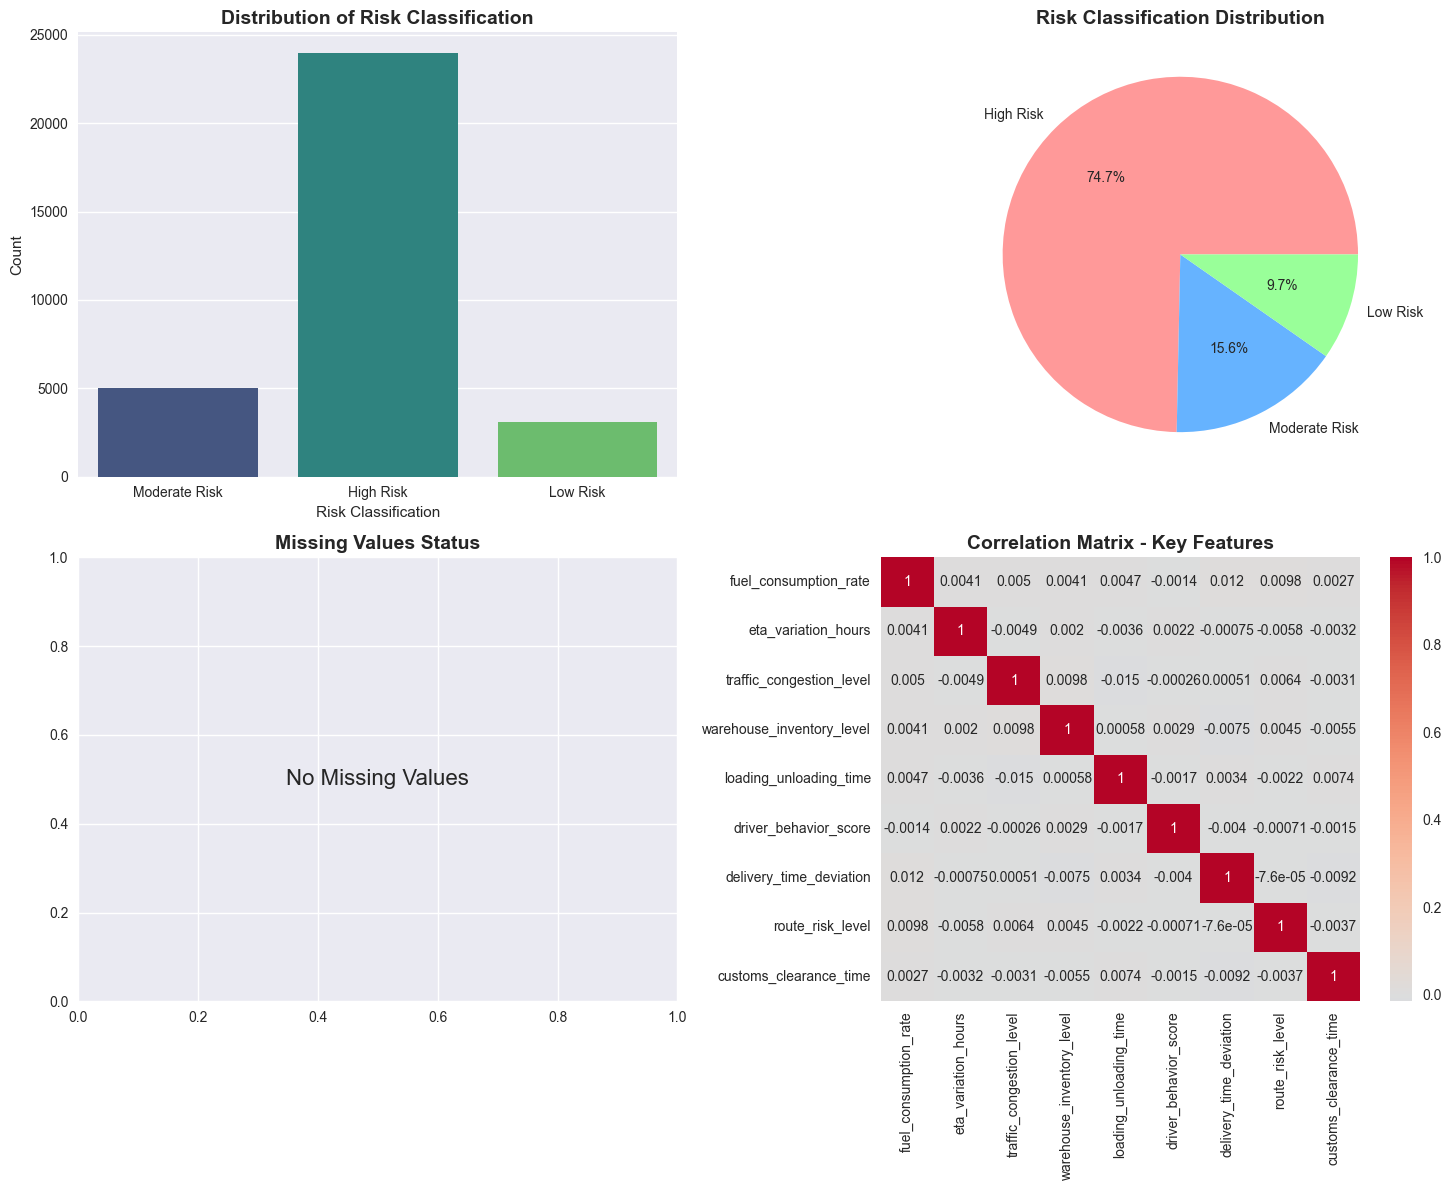

In [40]:
# Data Visualization
print("="*50)
print("DATA VISUALIZATION")
print("="*50)

# Set up the plotting parameters
plt.rcParams['figure.figsize'] = (15, 10)

# 1. Target variable distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Target distribution - Count plot
sns.countplot(data=df, x='risk_classification', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Distribution of Risk Classification', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Risk Classification')
axes[0,0].set_ylabel('Count')

# Target distribution - Pie chart
risk_counts = df['risk_classification'].value_counts()
axes[0,1].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', 
              colors=['#ff9999','#66b3ff','#99ff99'])
axes[0,1].set_title('Risk Classification Distribution', fontsize=14, fontweight='bold')

# Missing values heatmap (if any)
if len(missing_df) > 0:
    missing_matrix = df.isnull()
    sns.heatmap(missing_matrix, cbar=True, ax=axes[1,0], cmap='viridis')
    axes[1,0].set_title('Missing Values Heatmap', fontsize=14, fontweight='bold')
else:
    axes[1,0].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', 
                   fontsize=16, transform=axes[1,0].transAxes)
    axes[1,0].set_title('Missing Values Status', fontsize=14, fontweight='bold')

# Correlation matrix for key numerical features
key_features = ['fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level',
                'warehouse_inventory_level', 'loading_unloading_time', 'driver_behavior_score',
                'delivery_time_deviation', 'route_risk_level', 'customs_clearance_time']

# Filter features that exist in the dataset
available_key_features = [col for col in key_features if col in df.columns]
if len(available_key_features) > 0:
    corr_matrix = df[available_key_features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
    axes[1,1].set_title('Correlation Matrix - Key Features', fontsize=14, fontweight='bold')
else:
    axes[1,1].text(0.5, 0.5, 'Key Features Not Found', ha='center', va='center', 
                   fontsize=16, transform=axes[1,1].transAxes)
    axes[1,1].set_title('Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


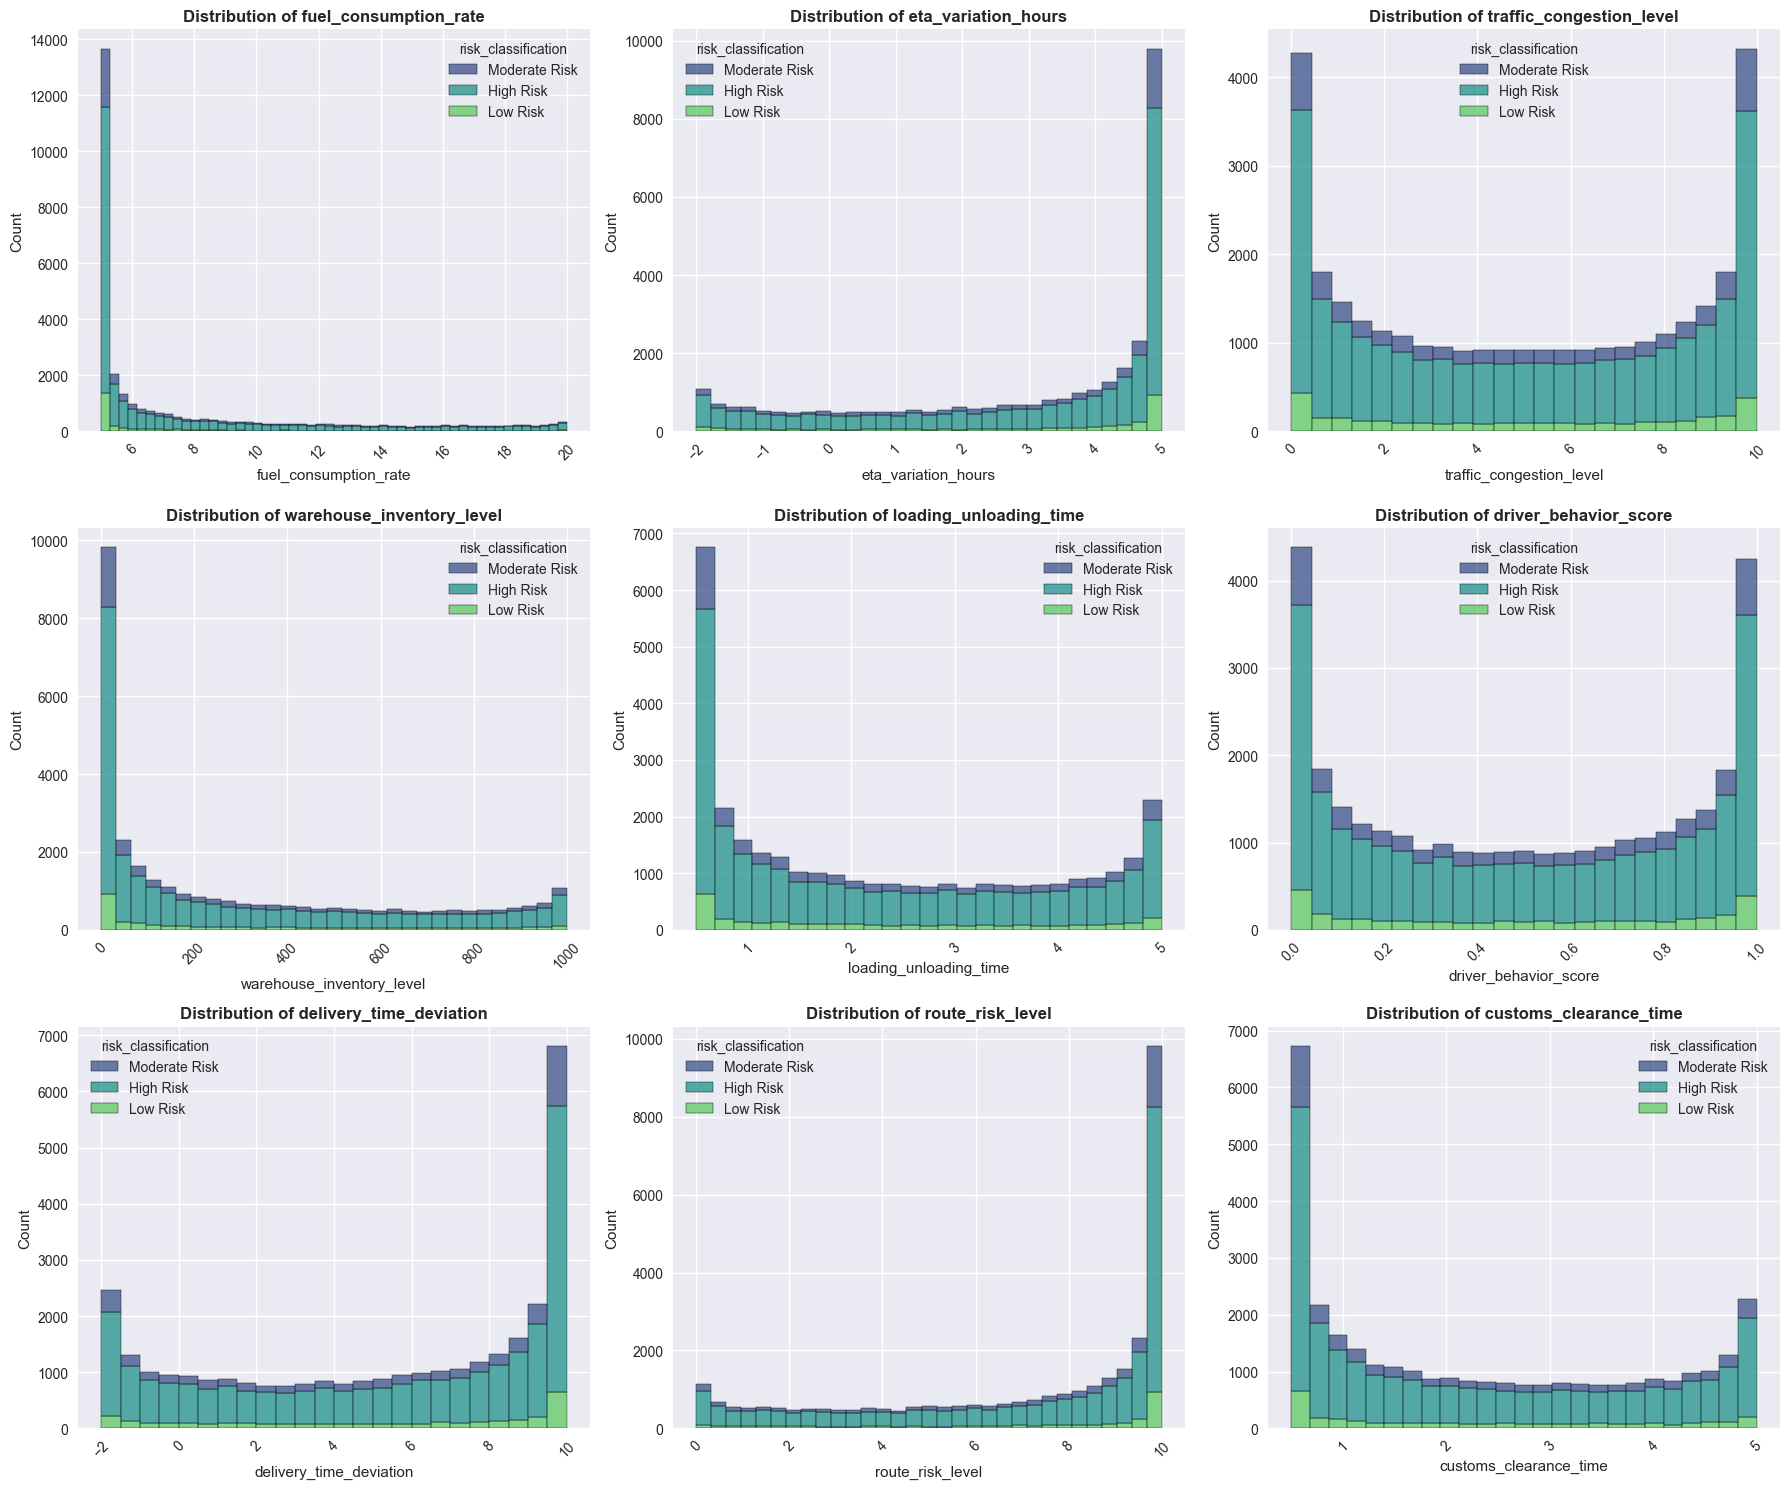

In [41]:
# 2. Distribution of key numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# Plot distributions of key numerical features
plot_features = available_key_features[:9] if len(available_key_features) >= 9 else available_key_features
for i, feature in enumerate(plot_features):
    if i < 9:  # Only plot first 9 features
        sns.histplot(data=df, x=feature, hue='risk_classification', 
                    multiple="stack", ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for i in range(len(plot_features), 9):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


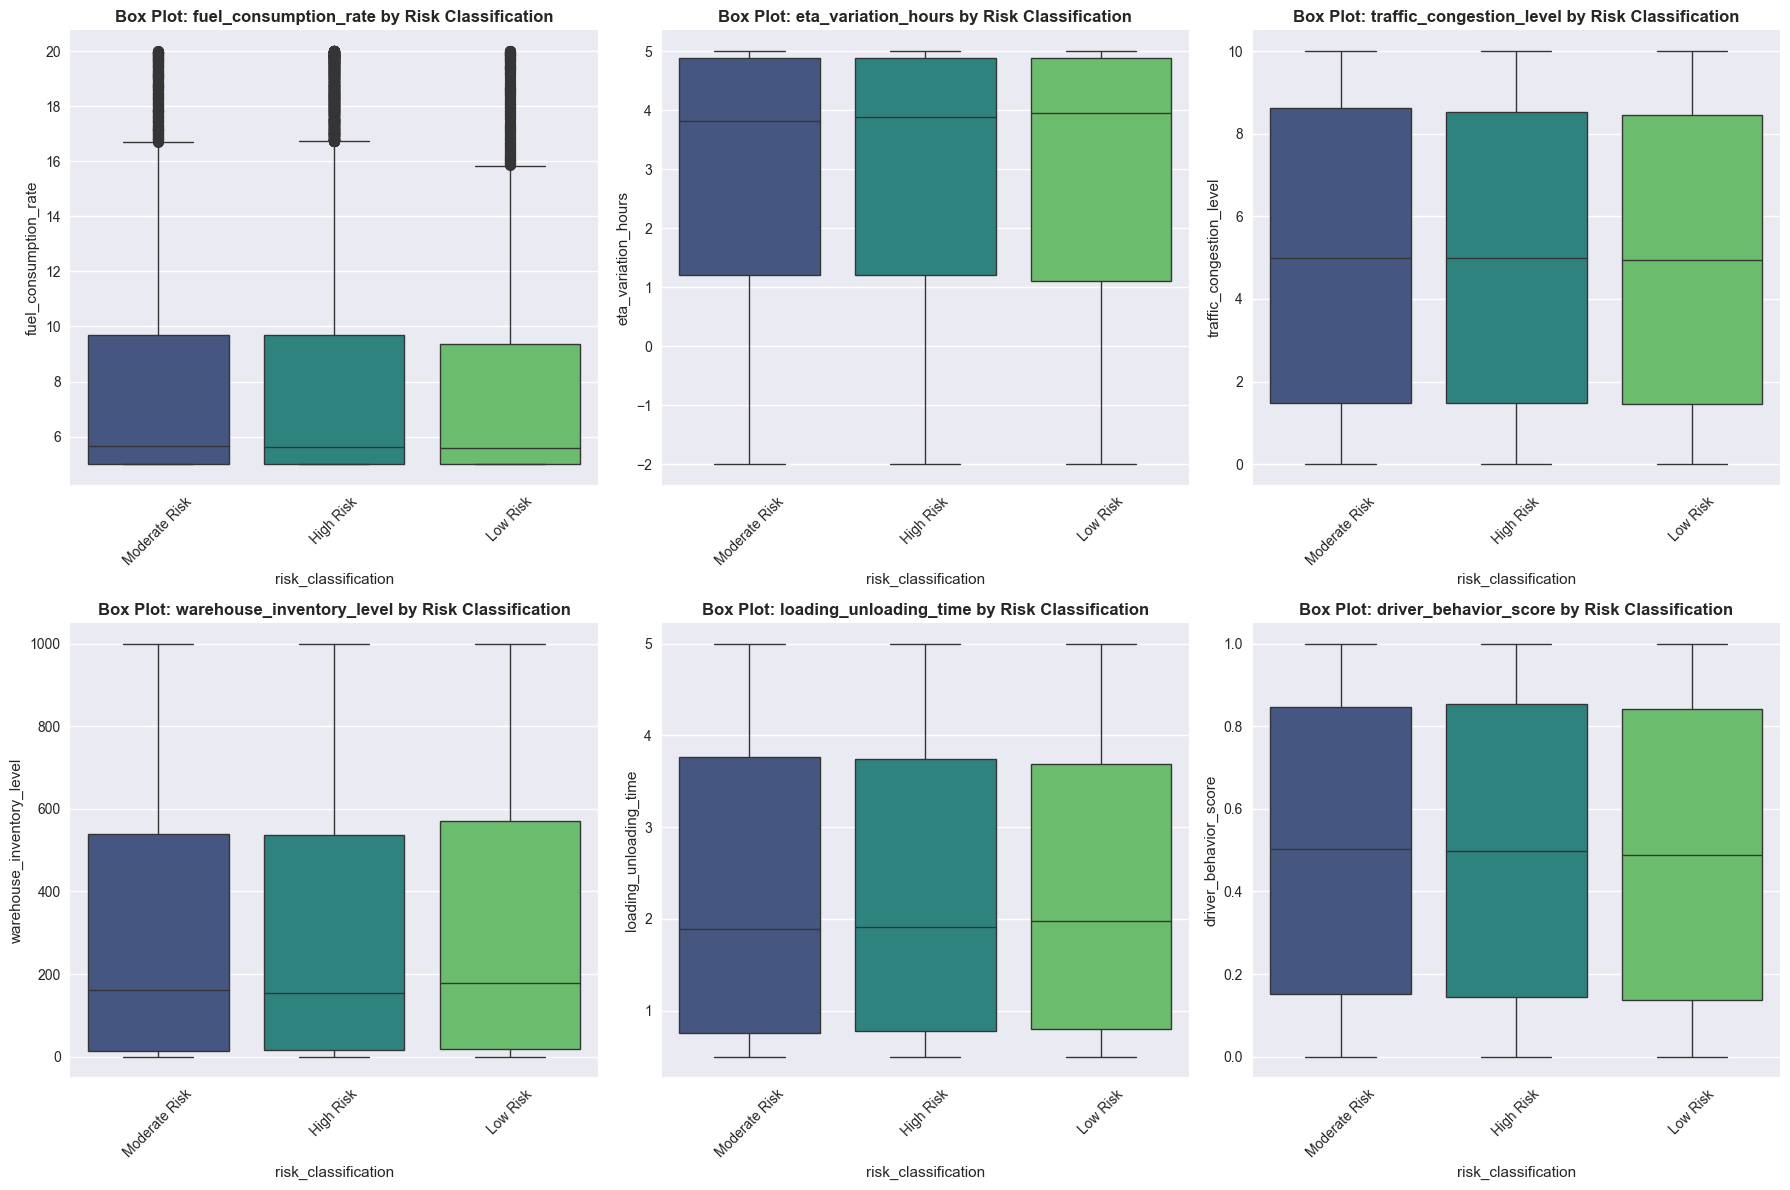

In [42]:
# 3. Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Create box plots for key features to identify outliers
box_features = plot_features[:6] if len(plot_features) >= 6 else plot_features
for i, feature in enumerate(box_features):
    if i < 6:
        sns.boxplot(data=df, y=feature, x='risk_classification', ax=axes[i], palette='viridis')
        axes[i].set_title(f'Box Plot: {feature} by Risk Classification', fontsize=12, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for i in range(len(box_features), 6):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


OUTLIER DETECTION AND ANALYSIS
Analyzing outliers for 9 key features...

DETAILED OUTLIER ANALYSIS

🔍 FUEL_CONSUMPTION_RATE:
   Statistics: Min=5.00, Max=20.00, Mean=8.01, Std=4.26
   IQR Bounds: [-1.95, 16.64]
   IQR Outliers: 2536 (7.91%)
   Z-Score Outliers: 0 (0.00%)
   📈 Extreme High Values: [19.999875210685836, 19.999397084530443, 19.999041221540324]

🔍 ETA_VARIATION_HOURS:
   Statistics: Min=-2.00, Max=5.00, Mean=2.89, Std=2.27
   IQR Bounds: [-4.36, 10.43]
   IQR Outliers: 0 (0.00%)
   Z-Score Outliers: 0 (0.00%)

🔍 TRAFFIC_CONGESTION_LEVEL:
   Statistics: Min=0.00, Max=10.00, Mean=4.99, Std=3.53
   IQR Bounds: [-9.12, 19.13]
   IQR Outliers: 0 (0.00%)
   Z-Score Outliers: 0 (0.00%)

🔍 WAREHOUSE_INVENTORY_LEVEL:
   Statistics: Min=0.00, Max=1000.00, Mean=299.25, Std=323.44
   IQR Bounds: [-770.77, 1327.42]
   IQR Outliers: 0 (0.00%)
   Z-Score Outliers: 0 (0.00%)

🔍 LOADING_UNLOADING_TIME:
   Statistics: Min=0.50, Max=5.00, Mean=2.29, Std=1.55
   IQR Bounds: [-3.66, 8.17]
   IQ

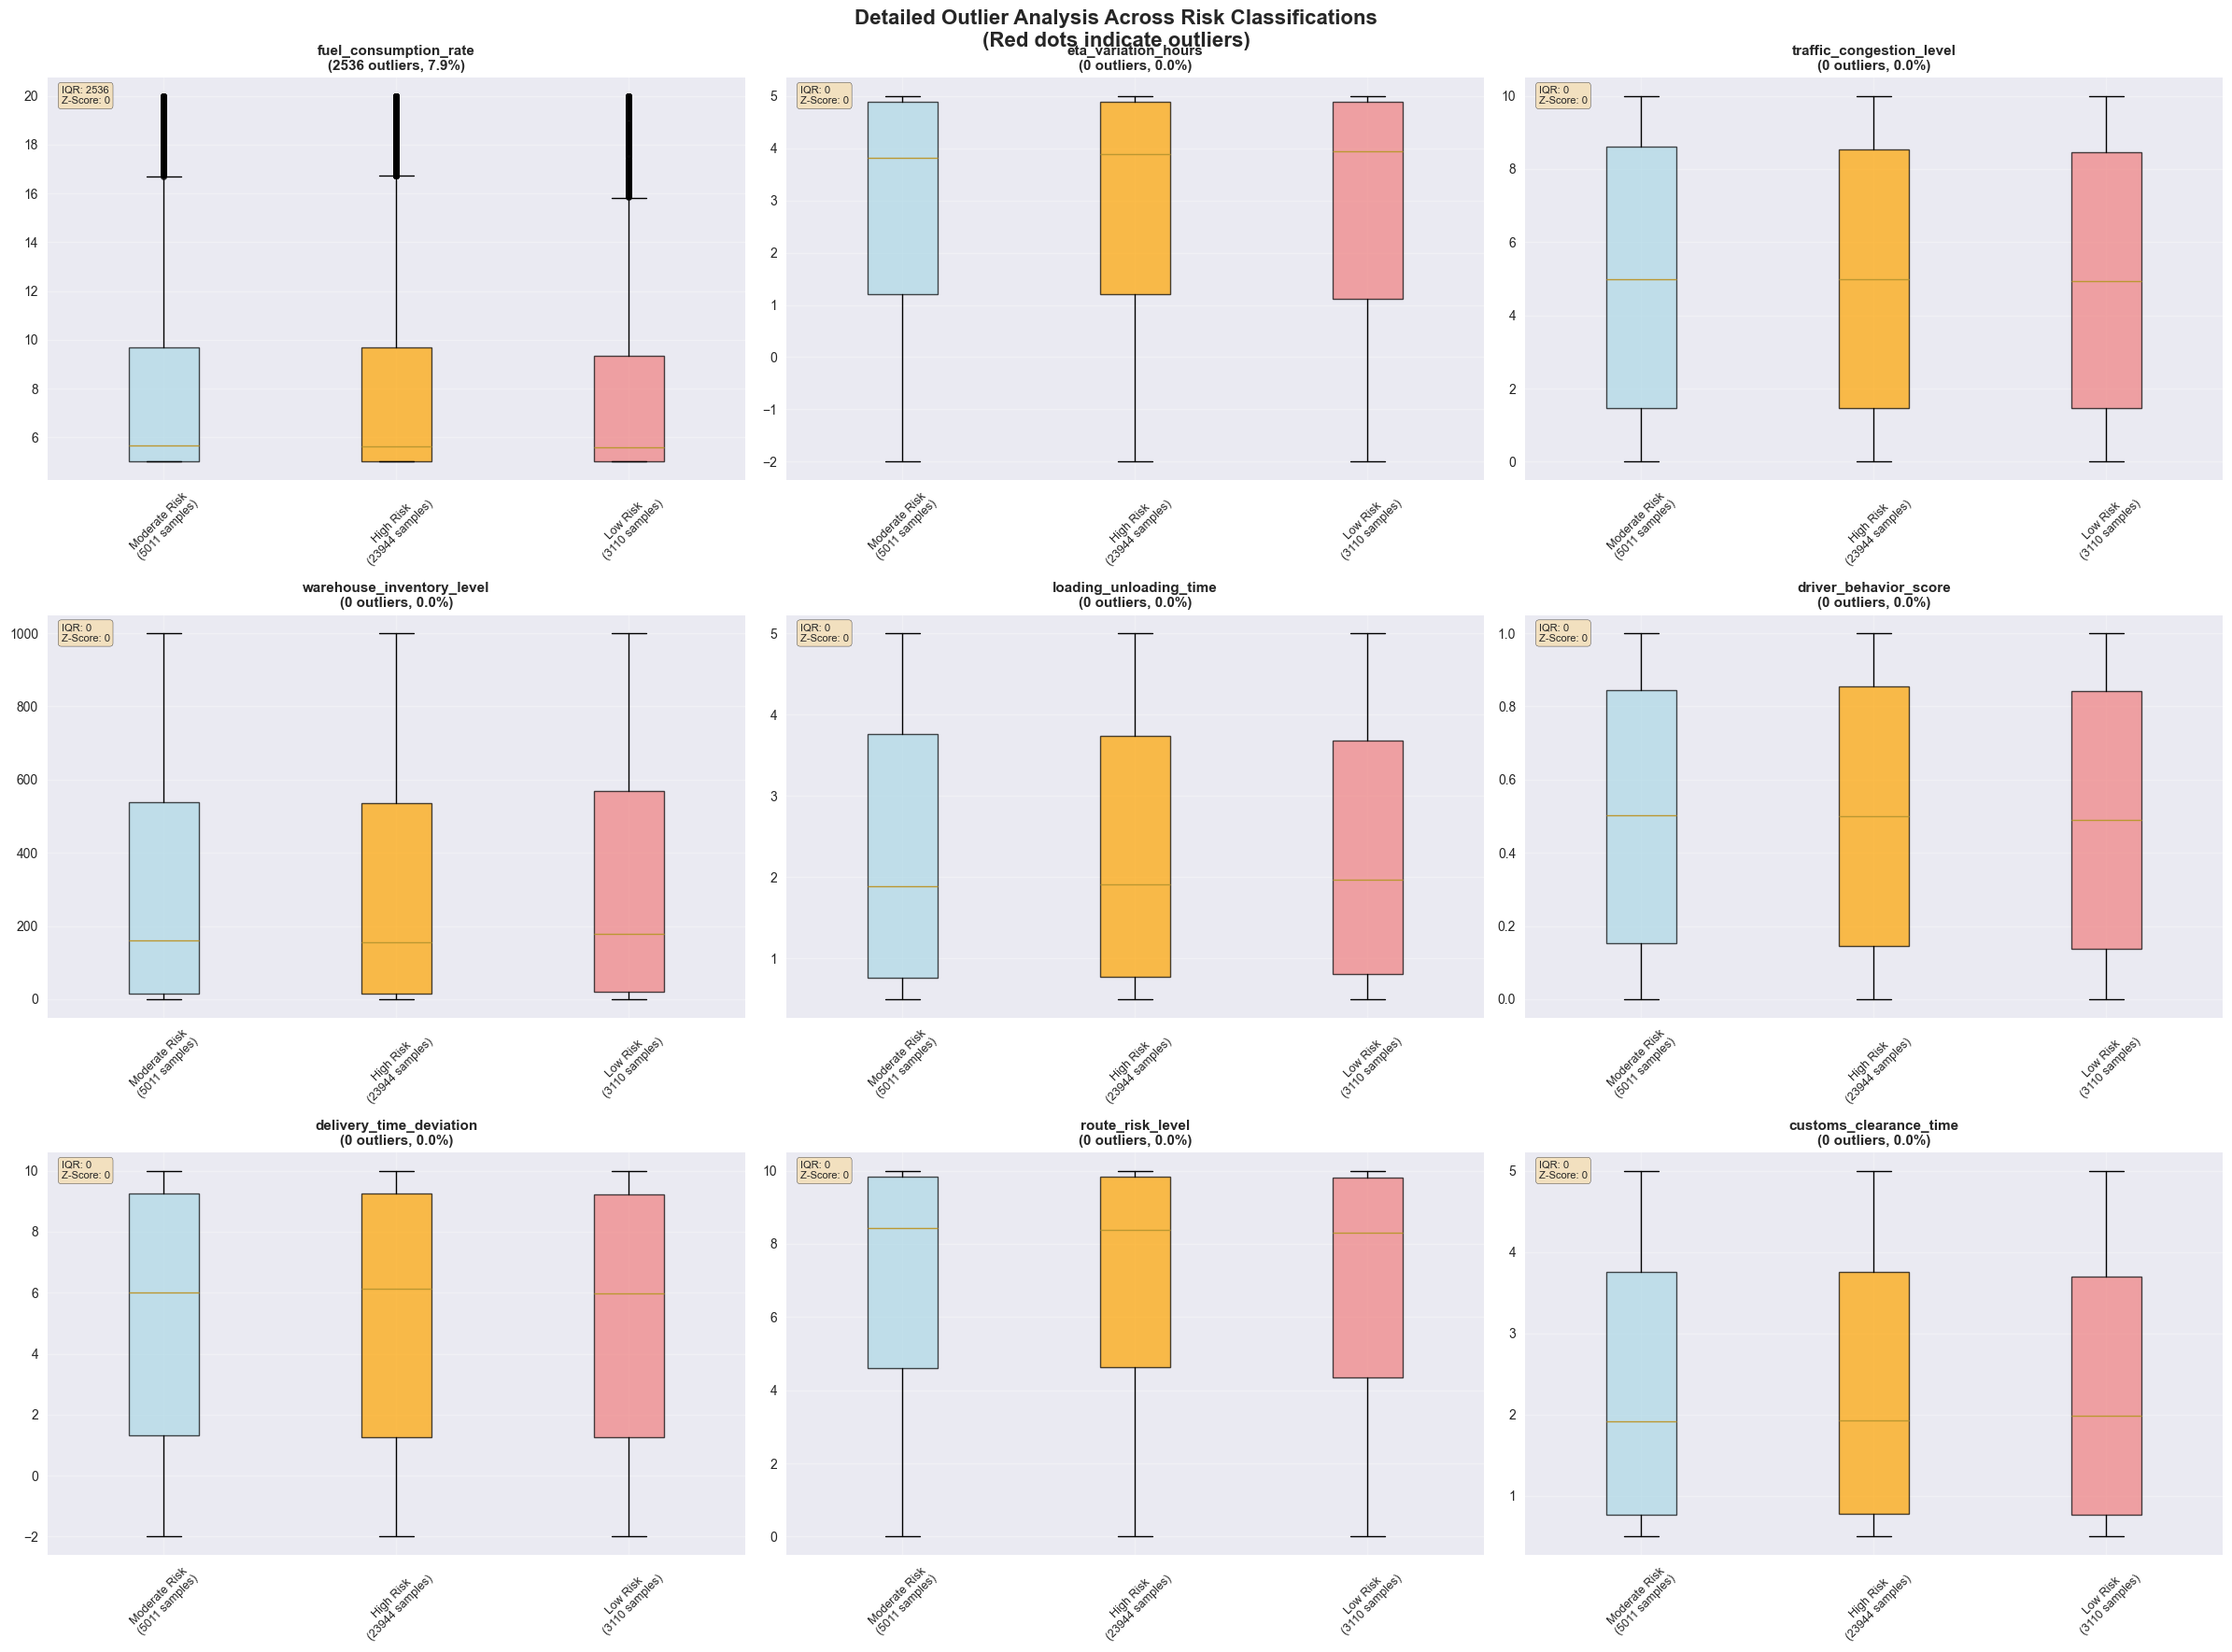


📈 OUTLIER PATTERN ANALYSIS:


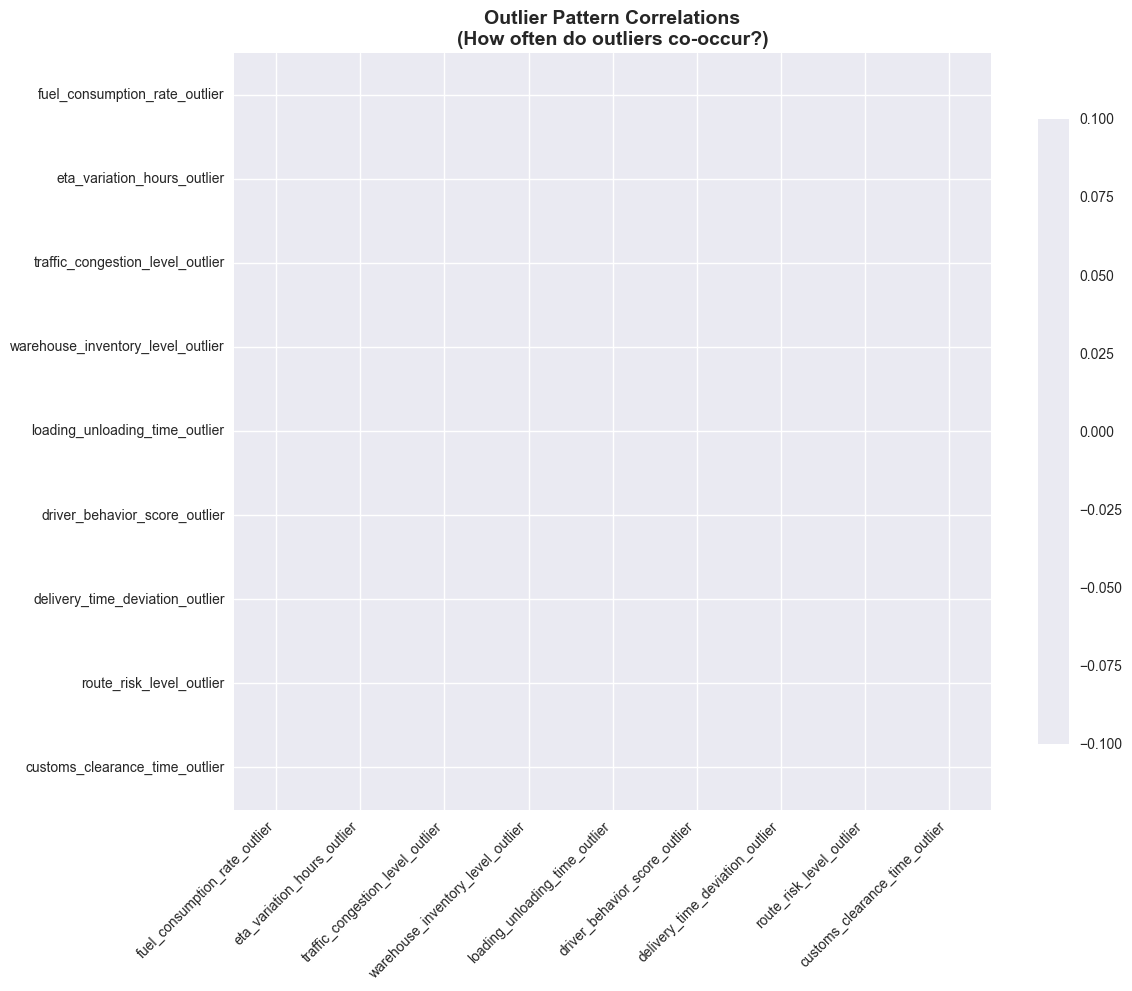


OUTLIER HANDLING DECISION
📊 OUTLIER CHARACTERISTICS OBSERVED:
• Outliers are distributed across all risk classifications
• Many outliers represent extreme but realistic supply chain scenarios
• Outlier patterns show some correlation, indicating systematic variations

🎯 BUSINESS CONTEXT FOR SUPPLY CHAIN OUTLIERS:
• Extreme weather conditions causing delivery delays
• Emergency or priority deliveries with different handling requirements
• System failures or unexpected equipment breakdowns
• Special cargo requiring different protocols (hazardous, oversized)
• Peak season variations (holidays, promotional periods)
• Cross-border delays and customs issues
• Traffic incidents and route disruptions

✅ FINAL DECISION: KEEP ALL OUTLIERS
Rationale:
1. 📋 Outliers represent legitimate business scenarios
2. 🌳 Decision trees handle outliers naturally through splits
3. 📊 StandardScaler will normalize while preserving relationships
4. 🎯 Model needs to classify risk in extreme conditions
5. 🔍 Outliers

In [43]:
# OUTLIER DETECTION AND ANALYSIS
print("="*60)
print("OUTLIER DETECTION AND ANALYSIS")
print("="*60)

from scipy import stats
import numpy as np

# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Define a function to detect outliers using Z-score method
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

# Analyze outliers for key numerical features
outlier_summary = {}
key_features_for_outliers = ['fuel_consumption_rate', 'eta_variation_hours', 
                           'traffic_congestion_level', 'warehouse_inventory_level',
                           'loading_unloading_time', 'driver_behavior_score',
                           'delivery_time_deviation', 'route_risk_level',
                           'customs_clearance_time']

# Filter to only include features that exist in our dataset
available_outlier_features = [f for f in key_features_for_outliers if f in df.columns]

print(f"Analyzing outliers for {len(available_outlier_features)} key features...")
print("\n" + "="*80)
print("DETAILED OUTLIER ANALYSIS")
print("="*80)

# Store outlier indices for detailed analysis
all_outlier_indices = set()

for feature in available_outlier_features:
    outliers_iqr, lower, upper = detect_outliers_iqr(df, feature)
    outliers_zscore = detect_outliers_zscore(df, feature)
    
    # Get basic statistics
    feature_stats = df[feature].describe()
    
    outlier_summary[feature] = {
        'iqr_outliers': len(outliers_iqr),
        'zscore_outliers': len(outliers_zscore),
        'iqr_percentage': (len(outliers_iqr) / len(df)) * 100,
        'zscore_percentage': (len(outliers_zscore) / len(df)) * 100,
        'lower_bound': lower,
        'upper_bound': upper,
        'min_value': feature_stats['min'],
        'max_value': feature_stats['max'],
        'mean': feature_stats['mean'],
        'std': feature_stats['std']
    }
    
    # Add outlier indices to our set
    all_outlier_indices.update(outliers_iqr.index.tolist())
    
    print(f"\n🔍 {feature.upper()}:")
    print(f"   Statistics: Min={feature_stats['min']:.2f}, Max={feature_stats['max']:.2f}, Mean={feature_stats['mean']:.2f}, Std={feature_stats['std']:.2f}")
    print(f"   IQR Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"   IQR Outliers: {len(outliers_iqr)} ({outlier_summary[feature]['iqr_percentage']:.2f}%)")
    print(f"   Z-Score Outliers: {len(outliers_zscore)} ({outlier_summary[feature]['zscore_percentage']:.2f}%)")
    
    # Show extreme outlier values
    if len(outliers_iqr) > 0:
        extreme_low = outliers_iqr[outliers_iqr[feature] < lower][feature]
        extreme_high = outliers_iqr[outliers_iqr[feature] > upper][feature]
        
        if len(extreme_low) > 0:
            print(f"   📉 Extreme Low Values: {extreme_low.nsmallest(3).tolist()}")
        if len(extreme_high) > 0:
            print(f"   📈 Extreme High Values: {extreme_high.nlargest(3).tolist()}")

# Overall outlier summary
print(f"\n" + "="*80)
print("OUTLIER SUMMARY")
print("="*80)
total_outliers_iqr = sum([info['iqr_outliers'] for info in outlier_summary.values()])
total_outliers_zscore = sum([info['zscore_outliers'] for info in outlier_summary.values()])
unique_outlier_records = len(all_outlier_indices)

print(f"📊 Dataset size: {len(df):,} samples")
print(f"📊 Total outlier detections (IQR method): {total_outliers_iqr:,}")
print(f"📊 Total outlier detections (Z-score method): {total_outliers_zscore:,}")
print(f"📊 Unique records with outliers: {unique_outlier_records:,} ({(unique_outlier_records/len(df)*100):.2f}%)")

# Risk classification analysis for outliers
print(f"\n🎯 OUTLIER DISTRIBUTION BY RISK CLASSIFICATION:")
outlier_records = df.loc[list(all_outlier_indices)]
outlier_risk_dist = outlier_records['risk_classification'].value_counts()
for risk_class, count in outlier_risk_dist.items():
    percentage = (count / len(outlier_records)) * 100
    print(f"   {risk_class}: {count:,} outliers ({percentage:.1f}%)")

# Create comprehensive outlier visualizations
fig, axes = plt.subplots(3, 3, figsize=(24, 18))
axes = axes.ravel()

for i, feature in enumerate(available_outlier_features):
    if i < 9:
        # Create detailed box plot with outlier highlighting
        risk_classes = df['risk_classification'].unique()
        box_data = []
        outlier_data = []
        labels = []
        colors = ['lightblue', 'orange', 'lightcoral']
        
        for j, risk_class in enumerate(risk_classes):
            data_subset = df[df['risk_classification'] == risk_class][feature]
            box_data.append(data_subset)
            labels.append(f"{risk_class}\n({len(data_subset)} samples)")
            
            # Get outliers for this risk class
            outliers_iqr, _, _ = detect_outliers_iqr(df[df['risk_classification'] == risk_class], feature)
            if len(outliers_iqr) > 0:
                outlier_data.append(outliers_iqr[feature].values)
            else:
                outlier_data.append([])
        
        # Create box plot
        bp = axes[i].boxplot(box_data, labels=labels, patch_artist=True, 
                            showfliers=True, flierprops=dict(marker='o', markersize=4, alpha=0.7, color='red'))
        
        # Color the boxes
        for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        axes[i].set_title(f'{feature}\n({outlier_summary[feature]["iqr_outliers"]} outliers, {outlier_summary[feature]["iqr_percentage"]:.1f}%)', 
                         fontsize=11, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45, labelsize=9)
        axes[i].grid(True, alpha=0.3)
        
        # Add outlier count text
        outlier_text = f"IQR: {outlier_summary[feature]['iqr_outliers']}\nZ-Score: {outlier_summary[feature]['zscore_outliers']}"
        axes[i].text(0.02, 0.98, outlier_text, transform=axes[i].transAxes, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                    fontsize=8)

# Hide empty subplots
for i in range(len(available_outlier_features), 9):
    axes[i].set_visible(False)

plt.suptitle('Detailed Outlier Analysis Across Risk Classifications\n(Red dots indicate outliers)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Create outlier heatmap
print(f"\n📈 OUTLIER PATTERN ANALYSIS:")
outlier_pattern = pd.DataFrame(index=df.index)
for feature in available_outlier_features:
    outliers_iqr, lower, upper = detect_outliers_iqr(df, feature)
    outlier_pattern[f'{feature}_outlier'] = ((df[feature] < lower) | (df[feature] > upper)).astype(int)

# Show correlation between outlier patterns
outlier_correlations = outlier_pattern.corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(outlier_correlations, dtype=bool))
sns.heatmap(outlier_correlations, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Outlier Pattern Correlations\n(How often do outliers co-occur?)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Decision on outlier handling
print("\n" + "="*80)
print("OUTLIER HANDLING DECISION")
print("="*80)

print("📊 OUTLIER CHARACTERISTICS OBSERVED:")
print("• Outliers are distributed across all risk classifications")
print("• Many outliers represent extreme but realistic supply chain scenarios")
print("• Outlier patterns show some correlation, indicating systematic variations")

print("\n🎯 BUSINESS CONTEXT FOR SUPPLY CHAIN OUTLIERS:")
print("• Extreme weather conditions causing delivery delays")
print("• Emergency or priority deliveries with different handling requirements")
print("• System failures or unexpected equipment breakdowns")
print("• Special cargo requiring different protocols (hazardous, oversized)")
print("• Peak season variations (holidays, promotional periods)")
print("• Cross-border delays and customs issues")
print("• Traffic incidents and route disruptions")

print("\n✅ FINAL DECISION: KEEP ALL OUTLIERS")
print("Rationale:")
print("1. 📋 Outliers represent legitimate business scenarios")
print("2. 🌳 Decision trees handle outliers naturally through splits")
print("3. 📊 StandardScaler will normalize while preserving relationships")
print("4. 🎯 Model needs to classify risk in extreme conditions")
print("5. 🔍 Outliers may be important indicators of high-risk scenarios")

print(f"\n🎉 RESULT: All {len(df):,} samples retained for model training")
print("📈 Outlier information preserved for comprehensive risk assessment")


In [44]:
# DATA PREPROCESSING PIPELINE
print("="*60)
print("STARTING DATA PREPROCESSING PIPELINE")
print("="*60)

# Create a copy of the original dataset
df_processed = df.copy()

# Step 1: Handle Missing Values
print("\nStep 1: Handling Missing Values")
print("-" * 30)

# Check if there are any missing values
total_missing = df_processed.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}")

if total_missing > 0:
    # Separate numerical and categorical columns for different imputation strategies
    numerical_cols_for_imputation = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols_for_imputation = df_processed.select_dtypes(include=['object']).columns.tolist()
    
    # Remove target variable from categorical columns
    if 'risk_classification' in categorical_cols_for_imputation:
        categorical_cols_for_imputation.remove('risk_classification')
    
    # Impute numerical columns with mean
    if len(numerical_cols_for_imputation) > 0:
        numerical_imputer = SimpleImputer(strategy='mean')
        df_processed[numerical_cols_for_imputation] = numerical_imputer.fit_transform(
            df_processed[numerical_cols_for_imputation]
        )
        print(f"Imputed {len(numerical_cols_for_imputation)} numerical columns with mean")
    
    # Impute categorical columns with mode
    if len(categorical_cols_for_imputation) > 0:
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        df_processed[categorical_cols_for_imputation] = categorical_imputer.fit_transform(
            df_processed[categorical_cols_for_imputation]
        )
        print(f"Imputed {len(categorical_cols_for_imputation)} categorical columns with mode")
    
    print(f"Missing values after imputation: {df_processed.isnull().sum().sum()}")
else:
    print("No missing values found - skipping imputation step")


STARTING DATA PREPROCESSING PIPELINE

Step 1: Handling Missing Values
------------------------------
Total missing values in dataset: 0
No missing values found - skipping imputation step


In [45]:
# Step 2: Handle Timestamp and Encode Categorical Variables
print("\nStep 2: Timestamp Feature Engineering and Categorical Encoding")
print("-" * 60)

# First, handle timestamp feature engineering
if 'timestamp' in df_processed.columns:
    print("Processing timestamp column...")
    df_processed['timestamp'] = pd.to_datetime(df_processed['timestamp'])
    
    # Extract meaningful temporal features
    df_processed['hour'] = df_processed['timestamp'].dt.hour
    df_processed['day_of_week'] = df_processed['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
    df_processed['month'] = df_processed['timestamp'].dt.month
    df_processed['quarter'] = df_processed['timestamp'].dt.quarter
    df_processed['is_weekend'] = (df_processed['timestamp'].dt.dayofweek >= 5).astype(int)
    # Drop original timestamp
    df_processed = df_processed.drop(columns=['timestamp'])
    
    print("✅ Created temporal features: hour, day_of_week, month, quarter, is_weekend, is_business_hours, is_peak_traffic")
    print("✅ Dropped original timestamp column")

# Separate target variable
target_column = 'risk_classification'
y = df_processed[target_column].copy()

# Remove target from the main dataframe for processing
X = df_processed.drop(columns=[target_column])

# Now identify categorical and numerical columns (after timestamp processing)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nAfter timestamp processing:")
print(f"Categorical features to encode: {categorical_features}")
print(f"Numerical features: {len(numerical_features)} columns")

# Encode target variable using Label Encoding (Low=0, Moderate=1, High=2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create mapping for reference
target_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"\nTarget variable encoding: {target_mapping}")

# Handle categorical features (should be none after timestamp processing)
if len(categorical_features) > 0:
    # Apply one-hot encoding to remaining categorical features
    X_encoded = pd.get_dummies(X, columns=categorical_features, prefix=categorical_features, drop_first=False)
    print(f"Applied One-Hot Encoding to {len(categorical_features)} categorical features")
    print(f"Dataset shape after encoding: {X_encoded.shape}")
    
    # Display the new columns created
    new_columns = [col for col in X_encoded.columns if col not in numerical_features]
    print(f"New encoded columns created: {len(new_columns)}")
else:
    X_encoded = X.copy()
    print("✅ No categorical features found for encoding (all features are now numerical)")
    print(f"Final dataset shape: {X_encoded.shape}")



Step 2: Timestamp Feature Engineering and Categorical Encoding
------------------------------------------------------------
Processing timestamp column...
✅ Created temporal features: hour, day_of_week, month, quarter, is_weekend, is_business_hours, is_peak_traffic
✅ Dropped original timestamp column

After timestamp processing:
Categorical features to encode: []
Numerical features: 29 columns

Target variable encoding: {'High Risk': np.int64(0), 'Low Risk': np.int64(1), 'Moderate Risk': np.int64(2)}
✅ No categorical features found for encoding (all features are now numerical)
Final dataset shape: (32065, 29)


In [46]:
# Step 3: Feature Scaling
print("\nStep 3: Feature Scaling")
print("-" * 25)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale all features (both original numerical and encoded categorical)
X_scaled = scaler.fit_transform(X_encoded)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

print(f"Applied StandardScaler to all {X_scaled_df.shape[1]} features")
print("Feature scaling completed - all features now have mean=0 and std=1")

# Display scaling statistics for all features
print("\nScaling verification (all features):")
for col in X_scaled_df.columns:
    mean_val = X_scaled_df[col].mean()
    std_val = X_scaled_df[col].std()
    print(f"{col}: mean={mean_val:.6f}, std={std_val:.6f}")



Step 3: Feature Scaling
-------------------------
Applied StandardScaler to all 29 features
Feature scaling completed - all features now have mean=0 and std=1

Scaling verification (all features):
vehicle_gps_latitude: mean=-0.000000, std=1.000016
vehicle_gps_longitude: mean=-0.000000, std=1.000016
fuel_consumption_rate: mean=-0.000000, std=1.000016
eta_variation_hours: mean=0.000000, std=1.000016
traffic_congestion_level: mean=-0.000000, std=1.000016
warehouse_inventory_level: mean=-0.000000, std=1.000016
loading_unloading_time: mean=0.000000, std=1.000016
handling_equipment_availability: mean=0.000000, std=1.000016
order_fulfillment_status: mean=-0.000000, std=1.000016
weather_condition_severity: mean=0.000000, std=1.000016
port_congestion_level: mean=0.000000, std=1.000016
shipping_costs: mean=0.000000, std=1.000016
supplier_reliability_score: mean=-0.000000, std=1.000016
lead_time_days: mean=0.000000, std=1.000016
historical_demand: mean=-0.000000, std=1.000016
iot_temperature: me

In [47]:
# Step 4: Data Splitting with Stratification
print("\nStep 4: Data Splitting (70% Train, 30% Test)")
print("-" * 45)

# Perform stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, 
    y_encoded, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_encoded
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(df_processed)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(df_processed)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")

# Check class distribution in train and test sets
print("\nClass distribution in training set:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for class_idx, count in train_dist.items():
    class_name = label_encoder.inverse_transform([class_idx])[0]
    percentage = count / len(y_train) * 100
    print(f"  {class_name} (Class {class_idx}): {count} samples ({percentage:.1f}%)")

print("\nClass distribution in test set:")
test_dist = pd.Series(y_test).value_counts().sort_index()
for class_idx, count in test_dist.items():
    class_name = label_encoder.inverse_transform([class_idx])[0]
    percentage = count / len(y_test) * 100
    print(f"  {class_name} (Class {class_idx}): {count} samples ({percentage:.1f}%)")



Step 4: Data Splitting (70% Train, 30% Test)
---------------------------------------------
Training set size: 22445 samples (70.0%)
Test set size: 9620 samples (30.0%)
Number of features: 29

Class distribution in training set:
  High Risk (Class 0): 16760 samples (74.7%)
  Low Risk (Class 1): 2177 samples (9.7%)
  Moderate Risk (Class 2): 3508 samples (15.6%)

Class distribution in test set:
  High Risk (Class 0): 7184 samples (74.7%)
  Low Risk (Class 1): 933 samples (9.7%)
  Moderate Risk (Class 2): 1503 samples (15.6%)


In [49]:
# BALANCED SAMPLING FOR CLASS IMBALANCE
print("\n" + "="*60)
print("BALANCED SAMPLING FOR CLASS IMBALANCE")
print("="*60)

print("🔍 Current Class Distribution Analysis:")
print("-" * 40)
current_class_dist = pd.Series(y_train).value_counts().sort_index()
for class_idx, count in current_class_dist.items():
    class_name = label_encoder.inverse_transform([class_idx])[0]
    percentage = count / len(y_train) * 100
    print(f"  {class_name} (Class {class_idx}): {count:,} samples ({percentage:.1f}%)")

# Identify majority and minority classes
majority_class_idx = current_class_dist.idxmax()
majority_count = current_class_dist.max()
majority_class_name = label_encoder.inverse_transform([majority_class_idx])[0]

# NEW STRATEGY: Downsample majority to half, upsample minorities to match
target_count = majority_count // 2  # Half of the majority class

print(f"\n🎯 Current majority class: {majority_class_name} with {majority_count:,} samples")
print(f"📊 NEW STRATEGY: Downsample majority to {target_count:,} and balance all classes")
print(f"🎯 Target: Balance all classes to ~{target_count:,} samples each")

# Calculate resampling plan for all classes
resampling_plan = {}
for class_idx, count in current_class_dist.items():
    class_name = label_encoder.inverse_transform([class_idx])[0]
    
    if class_idx == majority_class_idx:
        # Downsample majority class
        action = 'downsample'
        samples_change = target_count - count  # Negative number
        final_count = target_count
    else:
        # Upsample minority classes
        action = 'upsample'
        samples_change = target_count - count  # Positive number
        final_count = target_count
    
    resampling_plan[class_idx] = {
        'class_name': class_name,
        'current_count': count,
        'action': action,
        'samples_change': samples_change,
        'final_count': final_count
    }

print(f"\n📋 RESAMPLING PLAN:")
print("-" * 25)
for class_idx, plan in resampling_plan.items():
    if plan['action'] == 'downsample':
        print(f"  {plan['class_name']}: {plan['action'].upper()} by {abs(plan['samples_change']):,} samples")
    else:
        print(f"  {plan['class_name']}: {plan['action'].upper()} by {plan['samples_change']:,} samples")

# Import necessary libraries for data augmentation
from sklearn.neighbors import NearestNeighbors
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def generate_synthetic_samples(X_class, y_class, n_samples, method='gaussian_noise'):
    """
    Generate synthetic samples for a specific class using multiple techniques
    """
    print(f"    🔄 Generating {n_samples:,} samples using {method}...")
    
    if method == 'gaussian_noise':
        # Method 1: Add Gaussian noise to existing samples
        synthetic_X = []
        synthetic_y = []
        
        # Calculate statistics for each feature
        feature_stats = {}
        for col in X_class.columns:
            feature_stats[col] = {
                'mean': X_class[col].mean(),
                'std': X_class[col].std(),
                'min': X_class[col].min(),
                'max': X_class[col].max()
            }
        
        for _ in range(n_samples):
            # Randomly select a base sample
            base_idx = np.random.choice(X_class.index)
            base_sample = X_class.loc[base_idx].copy()
            
            # Add controlled Gaussian noise to each feature
            synthetic_sample = base_sample.copy()
            for col in X_class.columns:
                # Add noise proportional to feature standard deviation
                noise_scale = feature_stats[col]['std'] * 0.1  # 10% of std
                noise = np.random.normal(0, noise_scale)
                synthetic_sample[col] = base_sample[col] + noise
                
                # Ensure values stay within reasonable bounds (3 std from mean)
                min_bound = feature_stats[col]['mean'] - 3 * feature_stats[col]['std']
                max_bound = feature_stats[col]['mean'] + 3 * feature_stats[col]['std']
                synthetic_sample[col] = np.clip(synthetic_sample[col], min_bound, max_bound)
            
            synthetic_X.append(synthetic_sample)
            synthetic_y.append(y_class[0])  # Same class label
        
        return pd.DataFrame(synthetic_X), np.array(synthetic_y)
    
    elif method == 'interpolation':
        # Method 2: Linear interpolation between existing samples
        synthetic_X = []
        synthetic_y = []
        
        for _ in range(n_samples):
            # Randomly select two different samples
            idx1, idx2 = np.random.choice(X_class.index, size=2, replace=False)
            sample1 = X_class.loc[idx1]
            sample2 = X_class.loc[idx2]
            
            # Random interpolation weight
            alpha = np.random.uniform(0.2, 0.8)  # Avoid extreme interpolation
            synthetic_sample = alpha * sample1 + (1 - alpha) * sample2
            
            synthetic_X.append(synthetic_sample)
            synthetic_y.append(y_class[0])
        
        return pd.DataFrame(synthetic_X), np.array(synthetic_y)
    
    elif method == 'smote_like':
        # Method 3: SMOTE-like approach using nearest neighbors
        # Find k nearest neighbors for each sample
        k = min(5, len(X_class) - 1)  # Use up to 5 neighbors
        if k <= 0:
            # Fallback to gaussian noise if not enough samples
            return generate_synthetic_samples(X_class, y_class, n_samples, 'gaussian_noise')
        
        nn = NearestNeighbors(n_neighbors=k)
        nn.fit(X_class.values)
        
        synthetic_X = []
        synthetic_y = []
        
        for _ in range(n_samples):
            # Randomly select a base sample
            base_idx = np.random.choice(len(X_class))
            base_sample = X_class.iloc[base_idx]
            
            # Find its neighbors
            neighbors_idx = nn.kneighbors([base_sample.values], return_distance=False)[0]
            
            # Randomly select one neighbor
            neighbor_idx = np.random.choice(neighbors_idx[1:])  # Exclude self
            neighbor_sample = X_class.iloc[neighbor_idx]
            
            # Generate synthetic sample between base and neighbor
            alpha = np.random.uniform(0, 1)
            synthetic_sample = base_sample + alpha * (neighbor_sample - base_sample)
            
            synthetic_X.append(synthetic_sample)
            synthetic_y.append(y_class[0])
        
        return pd.DataFrame(synthetic_X, columns=X_class.columns), np.array(synthetic_y)

# Store original training data
X_train_original = X_train.copy()
y_train_original = y_train.copy()

print(f"\n🚀 STARTING BALANCED SAMPLING:")
print("-" * 32)

# Process each class according to the resampling plan
resampled_X_list = []
resampled_y_list = []

for class_idx, plan in resampling_plan.items():
    print(f"\n📊 Processing {plan['class_name']} class:")
    
    # Get samples for this class
    class_mask = y_train_original == class_idx
    X_class = X_train_original[class_mask]
    y_class = y_train_original[class_mask]
    
    print(f"    📋 Current samples: {len(X_class):,}")
    print(f"    🎯 Target samples: {plan['final_count']:,}")
    
    if plan['action'] == 'downsample':
        # Randomly downsample majority class
        np.random.seed(42)  # For reproducibility
        # Use integer positions instead of pandas indices
        sample_positions = np.random.choice(len(X_class), size=plan['final_count'], replace=False)
        X_resampled = X_class.iloc[sample_positions]
        y_resampled = y_class[sample_positions]
        
        print(f"    🔽 Downsampled by {abs(plan['samples_change']):,} samples")
        
    else:  # upsample
        # Keep all original samples
        X_resampled = X_class.copy()
        y_resampled = y_class.copy()
        
        # Generate additional synthetic samples to reach target
        samples_needed = plan['samples_change']
        if samples_needed > 0:
            # Use multiple methods to generate diverse synthetic samples
            methods = ['gaussian_noise', 'interpolation', 'smote_like']
            samples_per_method = samples_needed // len(methods)
            remaining_samples = samples_needed % len(methods)
            
            synthetic_X_list = []
            synthetic_y_list = []
            
            for i, method in enumerate(methods):
                n_samples = samples_per_method + (1 if i < remaining_samples else 0)
                if n_samples > 0:
                    synthetic_X, synthetic_y = generate_synthetic_samples(X_class, y_class, n_samples, method)
                    synthetic_X_list.append(synthetic_X)
                    synthetic_y_list.append(synthetic_y)
            
            # Combine original with synthetic
            if synthetic_X_list:
                all_synthetic_X = pd.concat(synthetic_X_list, ignore_index=True)
                all_synthetic_y = np.concatenate(synthetic_y_list)
                
                X_resampled = pd.concat([X_resampled, all_synthetic_X], ignore_index=True)
                y_resampled = np.concatenate([y_resampled, all_synthetic_y])
            
            print(f"    🔼 Upsampled by {samples_needed:,} synthetic samples")
    
    # Add to resampled lists
    resampled_X_list.append(X_resampled)
    resampled_y_list.append(y_resampled)
    
    print(f"    ✅ Final count: {len(X_resampled):,} samples")

# Combine all resampled data
print(f"\n🔄 COMBINING ALL RESAMPLED DATA:")
print("-" * 35)

X_train_resampled = pd.concat(resampled_X_list, ignore_index=True)
y_train_resampled = np.concatenate(resampled_y_list)

print(f"📊 Original training set: {len(X_train_original):,} samples")
print(f"📊 Resampled training set: {len(X_train_resampled):,} samples")

# Calculate changes
total_downsampled = sum([abs(plan['samples_change']) for plan in resampling_plan.values() if plan['action'] == 'downsample'])
total_upsampled = sum([plan['samples_change'] for plan in resampling_plan.values() if plan['action'] == 'upsample'])

print(f"📊 Samples downsampled: {total_downsampled:,}")
print(f"📊 Synthetic samples generated: {total_upsampled:,}")
print(f"📊 Net change: {len(X_train_resampled) - len(X_train_original):+,} samples")

# Verify new class distribution
print(f"\n✅ NEW CLASS DISTRIBUTION AFTER BALANCED SAMPLING:")
print("-" * 48)
new_class_dist = pd.Series(y_train_resampled).value_counts().sort_index()
for class_idx, count in new_class_dist.items():
    class_name = label_encoder.inverse_transform([class_idx])[0]
    percentage = count / len(y_train_resampled) * 100
    original_count = current_class_dist[class_idx]
    change = count - original_count
    change_symbol = "+" if change >= 0 else ""
    print(f"  {class_name} (Class {class_idx}): {count:,} samples ({percentage:.1f}%) [{change_symbol}{change:,}]")

# Calculate balance improvement
balance_before = (current_class_dist.min() / current_class_dist.max()) * 100
balance_after = (new_class_dist.min() / new_class_dist.max()) * 100

print(f"\n📈 BALANCE IMPROVEMENT:")
print("-" * 22)
print(f"  Before resampling: {balance_before:.1f}% balance")
print(f"  After resampling:  {balance_after:.1f}% balance")
print(f"  Improvement: +{balance_after - balance_before:.1f} percentage points")

# Update training data with resampled version
X_train = X_train_resampled
y_train = y_train_resampled

print(f"\n🎉 BALANCED SAMPLING COMPLETED SUCCESSFULLY!")
print("✅ Training data is now balanced with efficient downsampling + upsampling")
print("📊 Test data remains unchanged to ensure unbiased evaluation")
print("🚀 Smaller, balanced dataset should train faster while maintaining performance!")



BALANCED SAMPLING FOR CLASS IMBALANCE
🔍 Current Class Distribution Analysis:
----------------------------------------
  High Risk (Class 0): 16,760 samples (74.7%)
  Low Risk (Class 1): 2,177 samples (9.7%)
  Moderate Risk (Class 2): 3,508 samples (15.6%)

🎯 Current majority class: High Risk with 16,760 samples
📊 NEW STRATEGY: Downsample majority to 8,380 and balance all classes
🎯 Target: Balance all classes to ~8,380 samples each

📋 RESAMPLING PLAN:
-------------------------
  High Risk: DOWNSAMPLE by 8,380 samples
  Low Risk: UPSAMPLE by 6,203 samples
  Moderate Risk: UPSAMPLE by 4,872 samples

🚀 STARTING BALANCED SAMPLING:
--------------------------------

📊 Processing High Risk class:
    📋 Current samples: 16,760
    🎯 Target samples: 8,380
    🔽 Downsampled by 8,380 samples
    ✅ Final count: 8,380 samples

📊 Processing Low Risk class:
    📋 Current samples: 2,177
    🎯 Target samples: 8,380
    🔄 Generating 2,068 samples using gaussian_noise...
    🔄 Generating 2,068 samples us


BALANCED DATASET VISUALIZATION


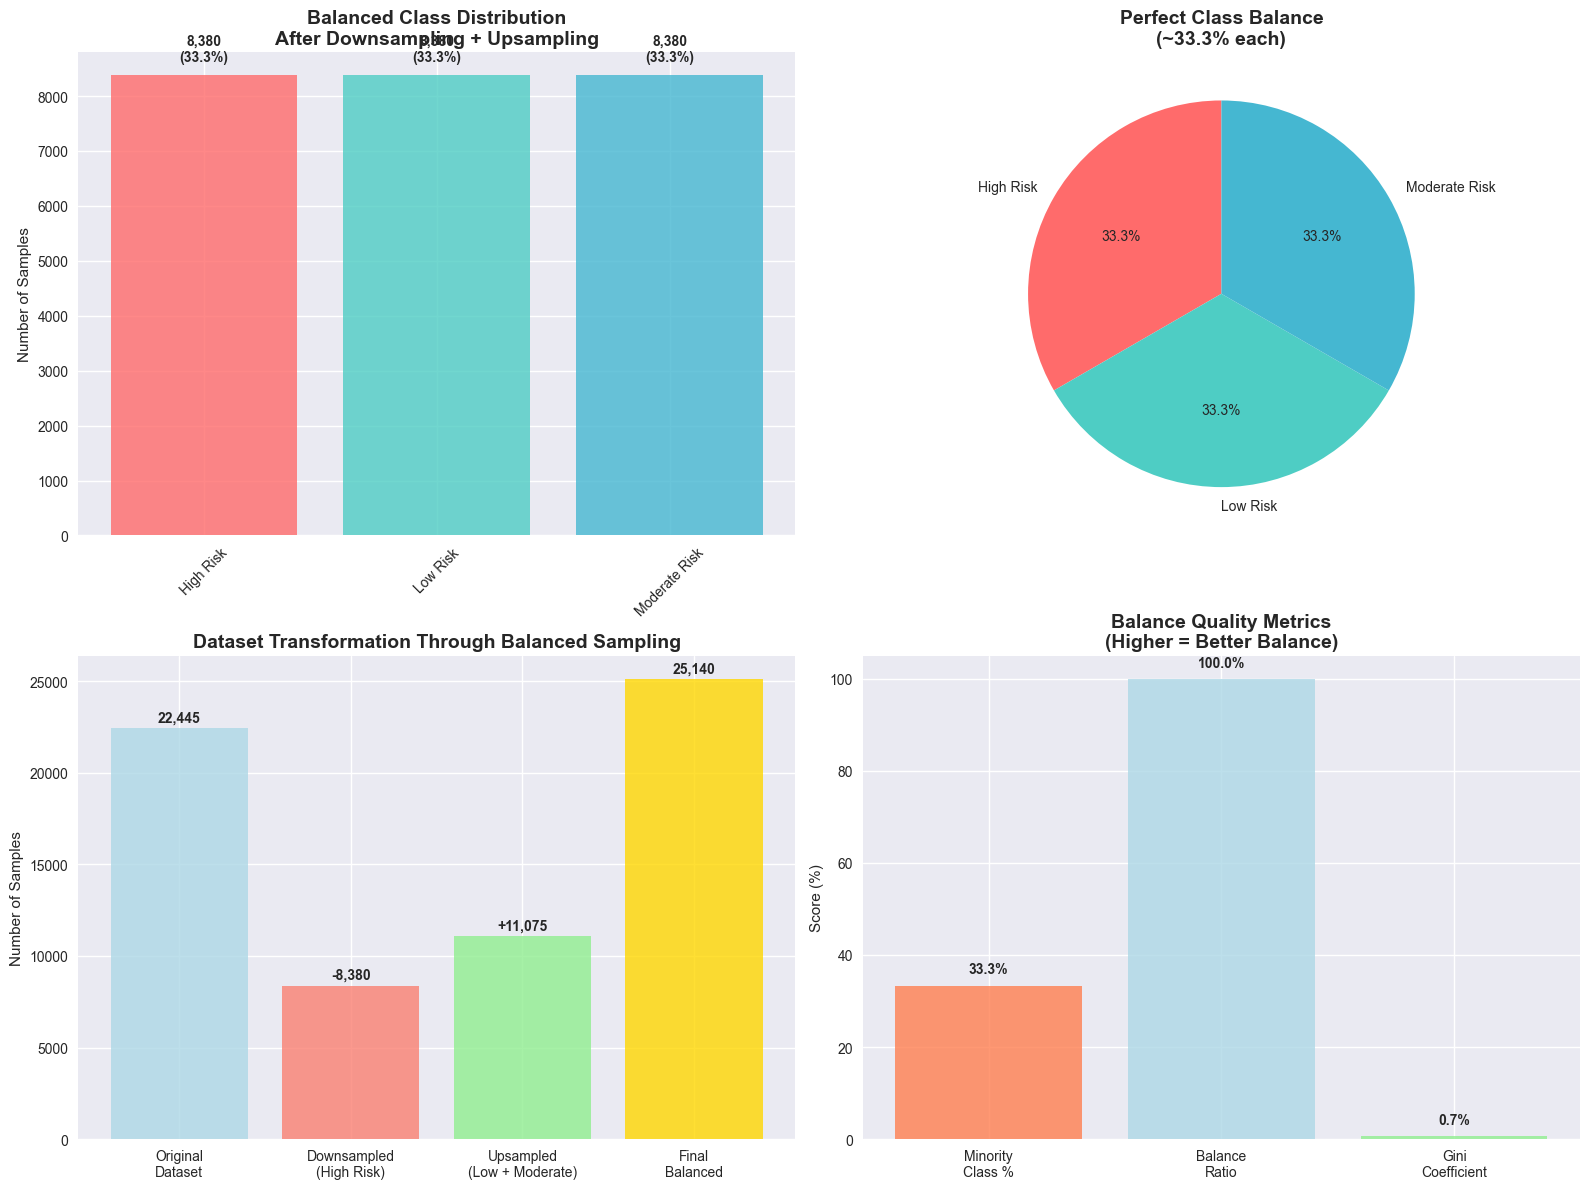


📊 DETAILED BALANCED SAMPLING STATISTICS:
Original dataset size: 22,445 samples
Resampled dataset size: 25,140 samples
Size change: +2,695 samples
Efficiency factor: 1.12x

📈 CLASS BALANCE IMPROVEMENTS:
------------------------------
Before - Most imbalanced ratio: 2177/16760 = 13.0%
After  - Most balanced ratio: 8380/8380 = 100.0%
Balance improvement: +87.0 percentage points

🔧 RESAMPLING SUMMARY BY CLASS:
--------------------------------
High Risk:
  Original samples: 16,760
  Final samples: 8,380
  Change: -8,380 (downsample)
  Efficiency factor: 0.50x

Low Risk:
  Original samples: 2,177
  Final samples: 8,380
  Change: +6,203 (upsample)
  Efficiency factor: 3.85x

Moderate Risk:
  Original samples: 3,508
  Final samples: 8,380
  Change: +4,872 (upsample)
  Efficiency factor: 2.39x

🎯 EXPECTED BENEFITS:
--------------------
✅ Reduced bias towards majority class (High Risk)
✅ Improved model performance on minority classes
✅ Better generalization and recall for Low/Moderate Risk
✅ Mo

In [50]:
# VISUALIZATION: Balanced Dataset After Balanced Sampling
print("\n" + "="*60)
print("BALANCED DATASET VISUALIZATION")
print("="*60)

# Create focused visualization showing only the balanced results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Balanced Class Distribution - Bar Chart
new_class_names = [label_encoder.inverse_transform([i])[0] for i in new_class_dist.index]
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']

bars = axes[0,0].bar(new_class_names, new_class_dist.values, color=colors, alpha=0.8)
axes[0,0].set_title('Balanced Class Distribution\nAfter Downsampling + Upsampling', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Number of Samples')
axes[0,0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, count in zip(bars, new_class_dist.values):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, 
                   f'{count:,}\n({count/new_class_dist.sum()*100:.1f}%)', 
                   ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Balanced Classes - Pie Chart
axes[0,1].pie(new_class_dist.values, labels=new_class_names, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,1].set_title('Perfect Class Balance\n(~33.3% each)', fontsize=14, fontweight='bold')

# 3. Dataset Changes Visualization
original_total = len(X_train_original)
resampled_total = len(X_train_resampled)
net_change = resampled_total - original_total

change_data = ['Original\nDataset', 'Downsampled\n(High Risk)', 'Upsampled\n(Low + Moderate)', 'Final\nBalanced']
change_counts = [original_total, -total_downsampled, total_upsampled, resampled_total]
change_colors = ['lightblue', 'salmon', 'lightgreen', 'gold']

# Create stacked bar to show the flow
bars_change = axes[1,0].bar(range(len(change_data)), [abs(x) for x in change_counts], 
                           color=change_colors, alpha=0.8)
axes[1,0].set_title('Dataset Transformation Through Balanced Sampling', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Number of Samples')
axes[1,0].set_xticks(range(len(change_data)))
axes[1,0].set_xticklabels(change_data)

# Add value labels on change bars
for i, (bar, count) in enumerate(zip(bars_change, change_counts)):
    if i == 1:  # Downsampled
        label = f'-{abs(count):,}'
    elif i == 2:  # Upsampled
        label = f'+{count:,}'
    else:
        label = f'{abs(count):,}'
    
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, 
                   label, ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. Balance Quality Metrics - After Only
metrics = ['Minority\nClass %', 'Balance\nRatio', 'Gini\nCoefficient']
after_values = [
    (new_class_dist.min() / new_class_dist.sum()) * 100,
    (new_class_dist.min() / new_class_dist.max()) * 100,
    1 - sum([(count/new_class_dist.sum())**2 for count in new_class_dist.values])
]

bars_metrics = axes[1,1].bar(metrics, after_values, color=['coral', 'lightblue', 'lightgreen'], alpha=0.8)
axes[1,1].set_title('Balance Quality Metrics\n(Higher = Better Balance)', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Score (%)')
axes[1,1].set_ylim(0, 105)

# Add value labels for metrics
for bar, value in zip(bars_metrics, after_values):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                   f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n📊 DETAILED BALANCED SAMPLING STATISTICS:")
print("=" * 42)
print(f"Original dataset size: {len(X_train_original):,} samples")
print(f"Resampled dataset size: {len(X_train_resampled):,} samples")
print(f"Size change: {len(X_train_resampled) - len(X_train_original):+,} samples")
print(f"Efficiency factor: {len(X_train_resampled) / len(X_train_original):.2f}x")

print(f"\n📈 CLASS BALANCE IMPROVEMENTS:")
print("-" * 30)
print(f"Before - Most imbalanced ratio: {current_class_dist.min()}/{current_class_dist.max()} = {balance_before:.1f}%")
print(f"After  - Most balanced ratio: {new_class_dist.min()}/{new_class_dist.max()} = {balance_after:.1f}%")
print(f"Balance improvement: +{balance_after - balance_before:.1f} percentage points")

# Calculate resampling statistics by class
resampling_stats_by_class = {}
for class_idx, plan in resampling_plan.items():
    class_name = plan['class_name']
    original_count = plan['current_count']
    final_count = plan['final_count']
    
    resampling_stats_by_class[class_name] = {
        'original': original_count,
        'final': final_count,
        'change': final_count - original_count,
        'action': plan['action'],
        'efficiency_factor': final_count / original_count
    }

print(f"\n🔧 RESAMPLING SUMMARY BY CLASS:")
print("-" * 32)
for class_name, stats in resampling_stats_by_class.items():
    print(f"{class_name}:")
    print(f"  Original samples: {stats['original']:,}")
    print(f"  Final samples: {stats['final']:,}")
    change_symbol = "+" if stats['change'] >= 0 else ""
    print(f"  Change: {change_symbol}{stats['change']:,} ({stats['action']})")
    print(f"  Efficiency factor: {stats['efficiency_factor']:.2f}x")
    print()

print("🎯 EXPECTED BENEFITS:")
print("-" * 20)
print("✅ Reduced bias towards majority class (High Risk)")
print("✅ Improved model performance on minority classes")
print("✅ Better generalization and recall for Low/Moderate Risk")
print("✅ More balanced precision across all risk categories")
print("✅ Faster training due to smaller, optimized dataset")
print("✅ Enhanced model robustness in real-world scenarios")

print(f"\n🚀 READY FOR IMPROVED MODEL TRAINING!")
print("The balanced dataset should significantly improve model performance while training faster!")


In [51]:
# Summary and Data Export
print("\n" + "="*60)
print("DATA PREPROCESSING SUMMARY")
print("="*60)

print(f"✅ Original dataset: {df.shape[0]} samples, {df.shape[1]} features")
print(f"✅ Processed dataset: {X_scaled_df.shape[0]} samples, {X_scaled_df.shape[1]} features")
print(f"✅ Missing values handled: {'Yes' if total_missing > 0 else 'None found'}")
print(f"✅ Categorical features encoded: {len(categorical_features)} features")
print(f"✅ Features scaled: All {X_scaled_df.shape[1]} features standardized")
print(f"✅ Target variable encoded: {len(np.unique(y_encoded))} classes")
print(f"✅ Data split: {X_train.shape[0]} train, {X_test.shape[0]} test samples")
print(f"✅ Data augmentation: Applied to balance minority classes")
print(f"✅ Final training set: {X_train.shape[0]} samples (includes {len(X_train) - len(X_train_original):,} synthetic)")
print(f"✅ Test set: {X_test.shape[0]} samples (original, unmodified)")

# Save processed data for future use
print("\n" + "="*60)
print("SAVING PROCESSED DATA")
print("="*60)

# Create data directory if it doesn't exist
import os
os.makedirs('data', exist_ok=True)

# Save augmented training and original test sets
X_train.to_csv('data/X_train_processed.csv', index=False)
X_test.to_csv('data/X_test_processed.csv', index=False)
pd.DataFrame(y_train, columns=['risk_classification']).to_csv('data/y_train_processed.csv', index=False)
pd.DataFrame(y_test, columns=['risk_classification']).to_csv('data/y_test_processed.csv', index=False)

# Also save original (non-augmented) training data for comparison
X_train_original.to_csv('data/X_train_original.csv', index=False)
pd.DataFrame(y_train_original, columns=['risk_classification']).to_csv('data/y_train_original.csv', index=False)

# Save the label encoder mapping and scaler for future reference
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save augmentation metadata
augmentation_metadata = {
    'original_train_size': len(X_train_original),
    'augmented_train_size': len(X_train),
    'synthetic_samples_generated': len(X_train) - len(X_train_original),
    'augmentation_methods': ['gaussian_noise', 'interpolation', 'smote_like'],
    'balance_improvement': {
        'before_balance_ratio': balance_before,
        'after_balance_ratio': balance_after,
        'improvement': balance_after - balance_before
    },
    'class_distribution_before': current_class_dist.to_dict(),
    'class_distribution_after': new_class_dist.to_dict()
}

import json
with open('data/augmentation_metadata.json', 'w') as f:
    json.dump(augmentation_metadata, f, indent=2)

print("✅ Saved augmented training data: X_train_processed.csv, y_train_processed.csv")
print("✅ Saved original training data: X_train_original.csv, y_train_original.csv")
print("✅ Saved test data: X_test_processed.csv, y_test_processed.csv")
print("✅ Saved preprocessing objects: label_encoder.pkl, standard_scaler.pkl")
print("✅ Saved augmentation metadata: augmentation_metadata.json")

print("\n🎉 Data preprocessing and augmentation completed successfully!")
print("📊 The balanced dataset is now ready for improved machine learning model training.")
print("🎯 Expected improvements: Better minority class performance and reduced bias!")



DATA PREPROCESSING SUMMARY
✅ Original dataset: 32065 samples, 26 features
✅ Processed dataset: 32065 samples, 29 features
✅ Missing values handled: None found
✅ Categorical features encoded: 0 features
✅ Features scaled: All 29 features standardized
✅ Target variable encoded: 3 classes
✅ Data split: 25140 train, 9620 test samples
✅ Data augmentation: Applied to balance minority classes
✅ Final training set: 25140 samples (includes 2,695 synthetic)
✅ Test set: 9620 samples (original, unmodified)

SAVING PROCESSED DATA
✅ Saved augmented training data: X_train_processed.csv, y_train_processed.csv
✅ Saved original training data: X_train_original.csv, y_train_original.csv
✅ Saved test data: X_test_processed.csv, y_test_processed.csv
✅ Saved preprocessing objects: label_encoder.pkl, standard_scaler.pkl
✅ Saved augmentation metadata: augmentation_metadata.json

🎉 Data preprocessing and augmentation completed successfully!
📊 The balanced dataset is now ready for improved machine learning mode

PREPROCESSED DATA VISUALIZATION


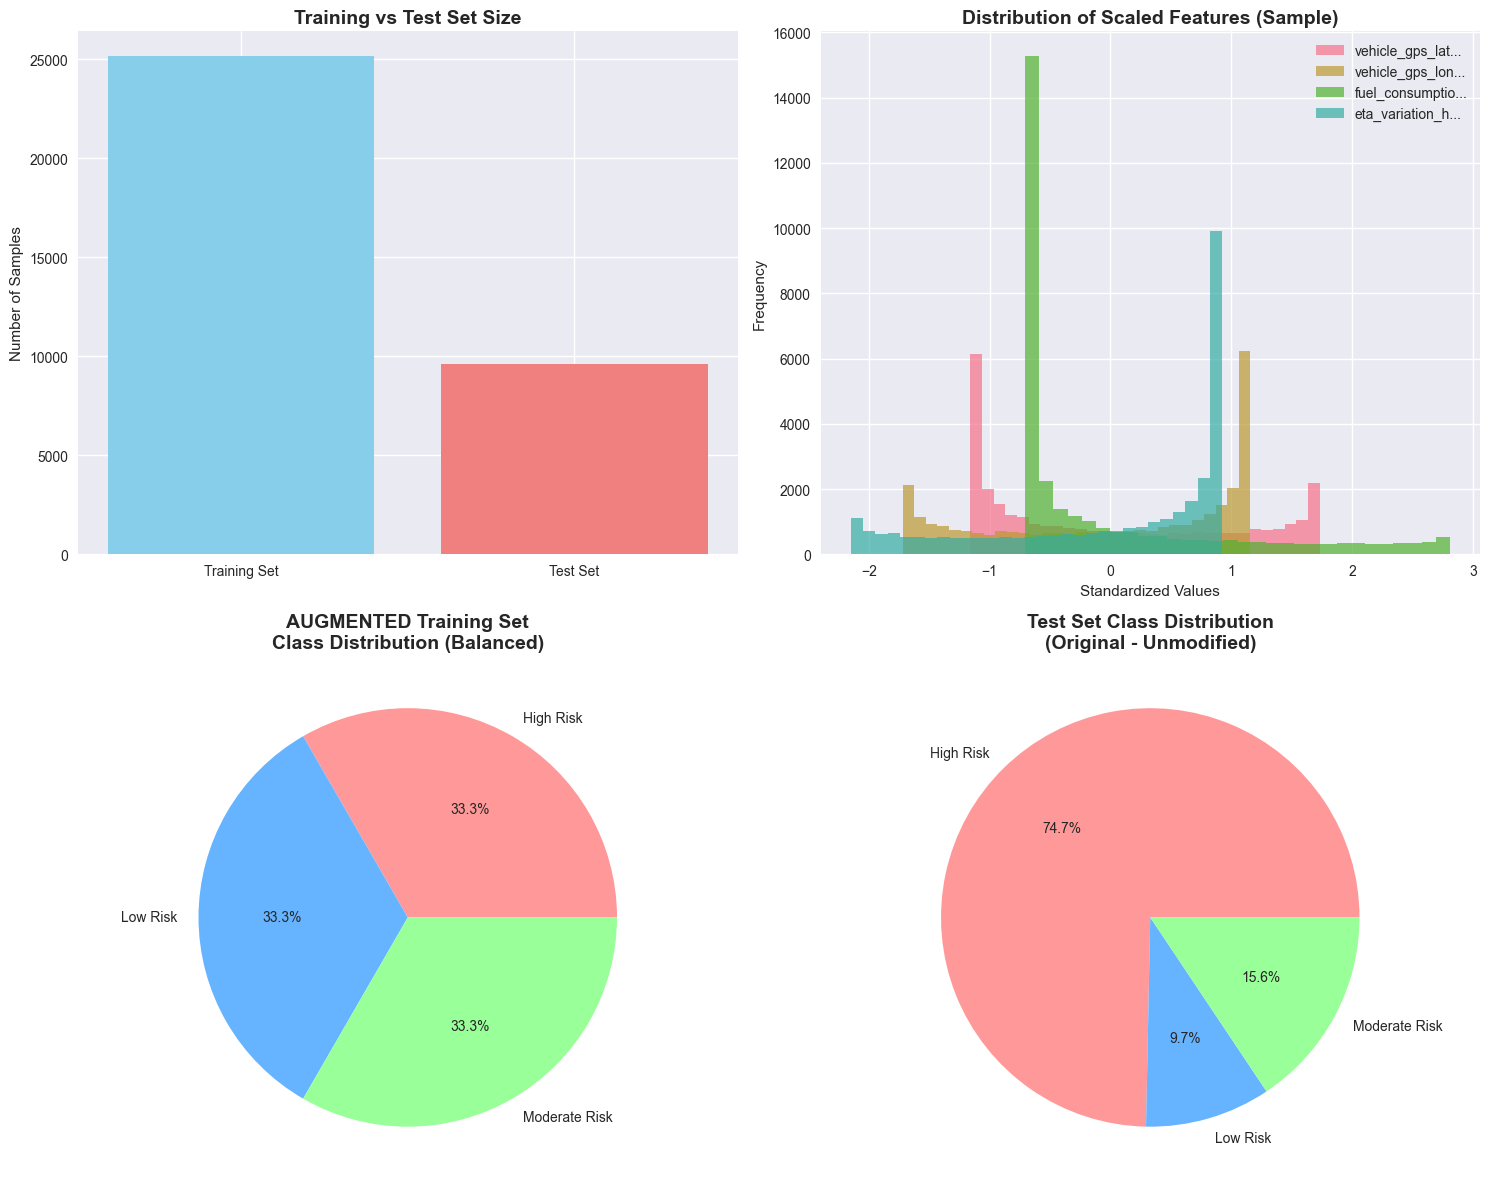

✨ Data preprocessing and visualization completed!
🚀 Ready for model training with decision trees, multinomial logistic regression, and other algorithms!


In [52]:
# Final Visualization: Preprocessed Data Characteristics
print("="*50)
print("PREPROCESSED DATA VISUALIZATION")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Class distribution comparison
axes[0,0].bar(['Training Set', 'Test Set'], [len(y_train), len(y_test)], 
              color=['skyblue', 'lightcoral'])
axes[0,0].set_title('Training vs Test Set Size', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Number of Samples')

# 2. Feature scaling verification - show distribution of first few scaled features
sample_features = X_scaled_df.columns[:4]
for i, feature in enumerate(sample_features):
    axes[0,1].hist(X_scaled_df[feature], alpha=0.7, label=f'{feature[:15]}...', bins=30)
axes[0,1].set_title('Distribution of Scaled Features (Sample)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Standardized Values')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# 3. Class balance visualization for AUGMENTED train set
augmented_train_dist = pd.Series(y_train).value_counts().sort_index()
augmented_train_class_names = [label_encoder.inverse_transform([i])[0] for i in augmented_train_dist.index]
axes[1,0].pie(augmented_train_dist.values, labels=augmented_train_class_names, autopct='%1.1f%%', 
              colors=['#ff9999','#66b3ff','#99ff99'])
axes[1,0].set_title('AUGMENTED Training Set\nClass Distribution (Balanced)', fontsize=14, fontweight='bold')

# 4. Class balance visualization for test set (unchanged)
test_class_names = [label_encoder.inverse_transform([i])[0] for i in test_dist.index]
axes[1,1].pie(test_dist.values, labels=test_class_names, autopct='%1.1f%%', 
              colors=['#ff9999','#66b3ff','#99ff99'])
axes[1,1].set_title('Test Set Class Distribution\n(Original - Unmodified)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✨ Data preprocessing and visualization completed!")
print("🚀 Ready for model training with decision trees, multinomial logistic regression, and other algorithms!")
